In [99]:
# Loading the needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [100]:
# Loading the dataset with pandas
allRaces = pd.read_csv('races.csv', sep=';', index_col='id')

In [101]:
# having a quick peek at the header
list(allRaces)

['race_created',
 'race_driven',
 'track_id',
 'challenger',
 'opponent',
 'money',
 'fuel_consumption',
 'winner',
 'status',
 'forecast',
 'weather']

In [102]:
# checking out how the values could look like
allRaces.values[1]

array(['06.03.2012', '06.03.2012 00:03', 12, 5, 4, 30, '0.63', 4,
       'finished',
       'a:4:{s:5:"sunny";i:70;s:5:"rainy";i:15;s:8:"thundery";i:0;s:5:"snowy";i:15;}',
       'sunny'], dtype=object)

In [103]:
# Fuel consumption should be a number i guess, so lets fix that
allRaces[['fuel_consumption']] = allRaces[['fuel_consumption']].apply(pd.to_numeric, errors='coerce')

In [104]:
allRaces.values[1] # Better

array(['06.03.2012', '06.03.2012 00:03', 12, 5, 4, 30, 0.63, 4, 'finished',
       'a:4:{s:5:"sunny";i:70;s:5:"rainy";i:15;s:8:"thundery";i:0;s:5:"snowy";i:15;}',
       'sunny'], dtype=object)

In [146]:
# Lets check if the weather affects the fuel_consumption
finished = allRaces.loc[allRaces['status'] == 'finished'] # Lets only consider finished races for that
finished.groupby(['weather'], as_index=False).mean()[['weather', 'fuel_consumption']]

,weather,fuel_consumption
0,rainy,9.807224
1,snowy,9.790905
2,sunny,9.495855
3,thundery,9.774463


In [106]:
# There seems to be no correlation as the averages of the fuel_consumption seem to be the same in all kinds of weather
# Lets just check really quick by just considering only one track

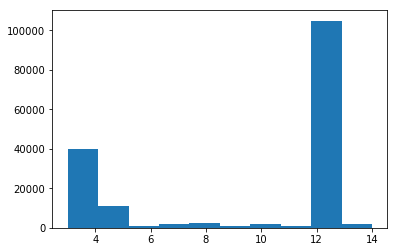

In [107]:
#Lets get the most populat tracks
plt.hist(allRaces['track_id'].values)
plt.show()

In [108]:
allRaces['track_id'].value_counts()

12    104878
3      38114
5      10901
8       2206
7       2132
4       1995
10      1806
13      1471
9        903
6        797
11       777
14       629
Name: track_id, dtype: int64

In [243]:
# Lets save that
tracks = pd.DataFrame(allRaces['track_id'].value_counts())
tracks.columns = ['races']
tracks.index.name = 'track_id'
tracks

,races
track_id,
12,104878
3,38114
5,10901
8,2206
7,2132
4,1995
10,1806
13,1471
9,903


In [244]:
# The most popular track seems to be track 12, so lets check our "weather affects fuel_consumption"-hypothesis only on track 12
finishedOnTrack12 = finished.loc[allRaces['track_id'] == 12]
finishedOnTrack12.groupby(['weather'], as_index=False).mean()[['weather', 'fuel_consumption']]

,weather,fuel_consumption
0,rainy,9.457026
1,snowy,9.709260
2,sunny,9.362550
3,thundery,9.799436


In [245]:
# There still seems to be no significant correlation between the weather and the fuel_consumption

In [246]:
# Lets further investigate the track preferances of the players, this time in percentages
popularity = allRaces['track_id'].value_counts() / allRaces['track_id'].value_counts().values.sum() * 100
popularity

12    62.948580
3     22.876315
5      6.542864
8      1.324058
7      1.279643
4      1.197414
10     1.083975
13     0.882905
9      0.541988
6      0.478366
11     0.466361
14     0.377531
Name: track_id, dtype: float64

In [247]:
# Lets save that
tracks['pupularity'] = popularity
tracks

,races,pupularity
track_id,,
12,104878,62.948580
3,38114,22.876315
5,10901,6.542864
8,2206,1.324058
7,2132,1.279643
4,1995,1.197414
10,1806,1.083975
13,1471,0.882905
9,903,0.541988


In [248]:
# 63% of all races are done on track 12, 86% of all races are done on track 12 or 3
# the rest of tracks account only for 14% of races 

In [249]:
# Are there any maps that get finished more often?
finishedRatio = finished['track_id'].value_counts() / allRaces['track_id'].value_counts() * 100
finishedRatio = finishedRatio.sort_values()
finishedRatio

3     59.455843
11    62.162162
4     63.909774
8     63.961922
5     64.397762
13    65.941536
10    66.666667
12    67.511776
6     68.381430
9     71.871539
7     74.953096
14    75.993641
Name: track_id, dtype: float64

In [250]:
# The most finished track is track 14, the track that gets finished the least is track 3. 
# As track 3 and 12 are the most popular tracks, it is interesting to see that they have quite a big gap
# regarding to the finished to unfinished races ratio

In [251]:
# Lets save that
tracks['finishedRatio'] = finishedRatio
tracks

,races,pupularity,finishedRatio
track_id,,,
12,104878,62.948580,67.511776
3,38114,22.876315,59.455843
5,10901,6.542864,64.397762
8,2206,1.324058,63.961922
7,2132,1.279643,74.953096
4,1995,1.197414,63.909774
10,1806,1.083975,66.666667
13,1471,0.882905,65.941536
9,903,0.541988,71.871539


In [252]:
# As the tracks are probably different in length, it is likely that they also differ in average fuel_consumption
# Lets check that, for obvious reasons lets only consider finished races
meanFuelConsumption = pd.DataFrame(finished[['track_id', 'fuel_consumption']].dropna().groupby(['track_id'], as_index=False).mean())
meanFuelConsumption = meanFuelConsumption.set_index(['track_id'])
meanFuelConsumption.sort_values('fuel_consumption')

,fuel_consumption
track_id,
4,0.923791
13,2.421139
7,2.592874
9,3.621559
10,4.731765
5,4.817917
12,9.483578
3,12.567264
6,12.696661


In [253]:
# There is quite a range of neccessary fuel for the different tracks. Probably they differ a lot in length. We can assume
# that probably track 4 is the shortest and track 14 the longest. By this meassure track 14 is probably more than 20 times
# longer than track 4. The most popular track 12 is pretty much in the middle with its needed fuel of 9.48 units on average.

In [254]:
# Lets save that
tracks['meanFuelConsumption'] = meanFuelConsumption['fuel_consumption']
tracks

,races,pupularity,finishedRatio,meanFuelConsumption
track_id,,,,
12,104878,62.948580,67.511776,9.483578
3,38114,22.876315,59.455843,12.567264
5,10901,6.542864,64.397762,4.817917
8,2206,1.324058,63.961922,13.147491
7,2132,1.279643,74.953096,2.592874
4,1995,1.197414,63.909774,0.923791
10,1806,1.083975,66.666667,4.731765
13,1471,0.882905,65.941536,2.421139
9,903,0.541988,71.871539,3.621559


In [259]:
# Lets also include the average money per track
meanMoney = pd.DataFrame(finished[['track_id', 'fuel_consumption', 'money']].dropna().groupby(['track_id'], as_index=False).mean())
meanMoney = meanMoney.set_index(['track_id'])
meanMoney.sort_values('money')

,fuel_consumption,money
track_id,,
10,4.731765,114.959044
11,12.920609,157.173210
7,2.592874,194.263502
13,2.421139,263.209809
3,12.567264,279.959315
8,13.147491,316.334545
4,0.923791,349.598901
14,18.831907,1062.404819
9,3.621559,1224.504695


In [260]:
# Lets save that
tracks['meanMoney'] = meanMoney['money']
tracks

,races,pupularity,finishedRatio,meanFuelConsumption,meanMoney
track_id,,,,,
12,104878,62.948580,67.511776,9.483578,2699.662897
3,38114,22.876315,59.455843,12.567264,279.959315
5,10901,6.542864,64.397762,4.817917,1402.618701
8,2206,1.324058,63.961922,13.147491,316.334545
7,2132,1.279643,74.953096,2.592874,194.263502
4,1995,1.197414,63.909774,0.923791,349.598901
10,1806,1.083975,66.666667,4.731765,114.959044
13,1471,0.882905,65.941536,2.421139,263.209809
9,903,0.541988,71.871539,3.621559,1224.504695


In [268]:
# Lets see if there is any correlations between the different attributes of the tracks
tracks.corr()

,races,pupularity,finishedRatio,meanFuelConsumption,meanMoney
races,1.000000,1.000000,-0.159806,0.123604,0.434617
pupularity,1.000000,1.000000,-0.159806,0.123604,0.434617
finishedRatio,-0.159806,-0.159806,1.000000,0.010400,0.219718
meanFuelConsumption,0.123604,0.123604,0.010400,1.000000,0.252360
meanMoney,0.434617,0.434617,0.219718,0.252360,1.000000


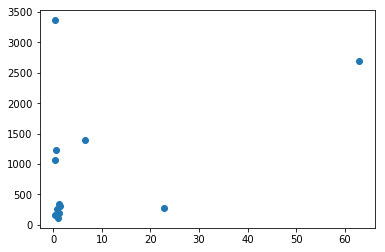

In [276]:
# There seems to be a correlation between the Money and the popularity of the track, lets investigate
x, y = tracks[['pupularity', 'meanMoney']].values.T
plt.scatter(x, y)
plt.show()

In [277]:
# It seems to be a litte far fatched to talk of a correlation here, but it is interesting that the most popular track is also
# one of the ones with the heighest mean money. Maybe only casuals with little money race on the other maps.

In [292]:
# Lets talk about the weather!
# Which is the most likely weather?
allRaces['weather'].value_counts() / allRaces['weather'].value_counts().sum() * 100

sunny       50.145281
rainy       25.015811
thundery    12.463909
snowy       12.374999
Name: weather, dtype: float64

In [286]:
# Sunny is the most likely

In [346]:
# Lets check if that is the same for all tracks
tracksWeather = pd.DataFrame(columns=('rainy', 'snowy', 'sunny', 'thundery'))
tracksWeather.index.name = 'track_id'

for x in range(3, 15):
    onlyTrack = allRaces.loc[allRaces['track_id'] == x]
    tracksWeather.loc[x] = onlyTrack['weather'].value_counts(normalize=True).sort_index().values

tracksWeather

,rainy,snowy,sunny,thundery
track_id,,,,
3,0.248268,0.125502,0.500375,0.125855
4,0.259608,0.116863,0.492549,0.130980
5,0.254416,0.125071,0.492165,0.128348
6,0.253211,0.130275,0.506422,0.110092
7,0.232791,0.133917,0.518148,0.115144
8,0.253012,0.115521,0.503189,0.128278
9,0.269646,0.130971,0.471495,0.127889
10,0.230897,0.126246,0.503322,0.139535
11,0.256729,0.120083,0.509317,0.113872


In [ ]:
# The distribution of the probabilites for the different weathers seem to be quite similar on the different tracks

In [351]:
# Lets save that
tracks = tracks.join(tracksWeather)
tracks

,races,pupularity,finishedRatio,meanFuelConsumption,meanMoney,rainy,snowy,sunny,thundery
track_id,,,,,,,,,
12,104878,62.948580,67.511776,9.483578,2699.662897,0.250674,0.122661,0.502945,0.123720
3,38114,22.876315,59.455843,12.567264,279.959315,0.248268,0.125502,0.500375,0.125855
5,10901,6.542864,64.397762,4.817917,1402.618701,0.254416,0.125071,0.492165,0.128348
8,2206,1.324058,63.961922,13.147491,316.334545,0.253012,0.115521,0.503189,0.128278
7,2132,1.279643,74.953096,2.592874,194.263502,0.232791,0.133917,0.518148,0.115144
4,1995,1.197414,63.909774,0.923791,349.598901,0.259608,0.116863,0.492549,0.130980
10,1806,1.083975,66.666667,4.731765,114.959044,0.230897,0.126246,0.503322,0.139535
13,1471,0.882905,65.941536,2.421139,263.209809,0.260825,0.138144,0.471134,0.129897
9,903,0.541988,71.871539,3.621559,1224.504695,0.269646,0.130971,0.471495,0.127889


In [290]:
# On which weather do the player spend the most money?
finished.groupby(['weather'], as_index=False).mean()[['weather', 'money']].sort_values("money")

,weather,money
3,thundery,1888.424474
1,snowy,1971.035849
0,rainy,2190.531841
2,sunny,2313.629561


In [291]:
# They spend the most money in the sun

In [372]:
# Lets talk winning
# Who is more likely to win? The opponent or the challenger?
challenger = 0
opponent = 0

for row in finished.itertuples():
    if getattr(row, 'winner') == getattr(row, 'challenger'):
        challenger = challenger + 1
    elif getattr(row, 'winner') == getattr(row, 'opponent'):
        opponent = opponent + 1
    else:
        raise Exception('Winner is nighter opponent nor challenger')
        
challenger / (challenger + opponent) * 100

56.076590986168526

In [373]:
# The challenger is slightly more likely to win. Challengers in 56% of the time

In [375]:
# Do older accounts win over newer accouts?
# Older accounts should have a lower id-number, while newer accounts should have a heigher one. Therefore could lower id
# drivers have more experience and win therefore more often. Lets check if that is true.

lowerId = 0
higherId = 0

for row in finished.itertuples():
    winnerId = getattr(row, 'winner')
    loserId = -1
    if winnerId == getattr(row, 'challenger'):
        loserId = getattr(row, 'opponent')
    elif winnerId == getattr(row, 'opponent'):
        loserId = getattr(row, 'challenger')
        
    if loserId == -1:
        raise Exception('Something went wrong')
    
    if winnerId > loserId:
        higherId = higherId + 1
    elif winnerId < loserId:
        lowerId = lowerId + 1
    else:
        raise Exception("Something went wrong")
    
lowerId / (lowerId + higherId) * 100

66.42865654130652

In [371]:
# This hypothesis can assumed to be true, lowerIds (probably older accounts) win significantly more often than higher ids (66%)

In [391]:
# Lets talk status
# How many races get finished?
allRaces['status'].value_counts(normalize=True) * 100

finished    65.482057
retired     25.943376
declined     6.837566
waiting      1.737001
Name: status, dtype: float64

In [392]:
# Only 65% of all races get finished. All the others are declined, retired or waiting.

In [419]:
# Lets talk timing
# First we convert the string of race_driven into datetimes
allRaces['race_driven'] = pd.to_datetime(allRaces['race_driven'], errors='coerce')

In [420]:
# On which days happen the most races? 
# Lets create a field for weekdays
allRaces['weekday'] = allRaces.apply(lambda row: row['race_driven'].isoweekday(), axis=1)

In [430]:
allRaces['weekday'].value_counts()

7.0    17212
1.0    16069
3.0    16036
2.0    15335
6.0    15136
5.0    14711
4.0    14600
Name: weekday, dtype: int64

In [432]:
# At which hours happen the most races?
allRaces['hour'] = allRaces.apply(lambda row: row['race_driven'].hour, axis=1)

In [433]:
allRaces['hour'].value_counts()

21.0    8281
20.0    7956
14.0    7310
19.0    7082
18.0    6991
13.0    6982
22.0    6945
15.0    6767
17.0    6688
12.0    6394
16.0    6143
11.0    4696
23.0    4690
0.0     4540
10.0    4053
9.0     3074
8.0     2233
1.0     1960
6.0     1857
7.0     1778
2.0     1154
3.0      649
5.0      442
4.0      434
Name: hour, dtype: int64

In [497]:
# How did amout of racings per week develope?
import datetime
import math

dates = allRaces.dropna().apply(lambda row: int((row['race_driven'] - datetime.datetime(1970,1,1)).days / 7), axis=1)

In [503]:
x, y = dates.value_counts().T
#plt.scatter(x, y)
#plt.gca().invert_xaxis()
#plt.show()

x

ValueError: too many values to unpack (expected 2)

In [481]:
# Lets talk prediction